In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import matplotlib.pyplot as plt

file = fits.open("/mnt/c/Users/joerg/OneDrive/Dokumente/UNI/Bachelor of Science/Bachelorarbeit/Jupyter Notebook/blazar.fits")
data = file[1].data

## Blazar Catalog Data Histogram (LowRes)

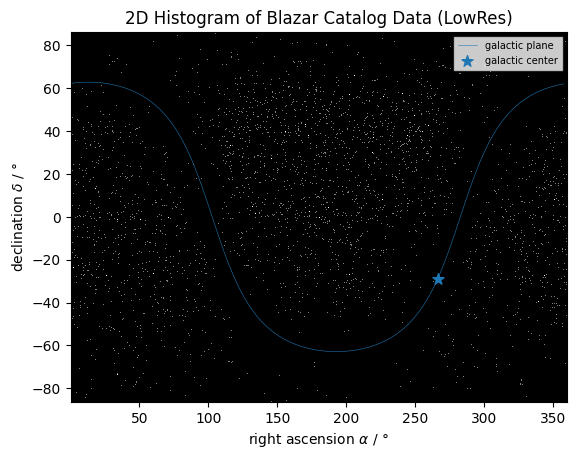

In [2]:
#catalog data
plt.hist2d(data.field(2), data.field(3), bins =[500, 500],cmap = "gray")
plt.title("2D Histogram of Blazar Catalog Data (LowRes)")
plt.xlabel(r"right ascension $\alpha$ / °")
plt.ylabel(r"declination $\delta$ / °")

#galactic plane and galactic center
l_interval = np.linspace(0, 360, 360) - np.linspace(243, 244, 360)
galactic_plane_coords = SkyCoord(l=l_interval*u.degree, b=0*u.degree, frame='galactic')
galactic_center_coords = SkyCoord(l=0*u.degree, b=0*u.degree, frame="galactic")
gp = plt.plot(galactic_plane_coords.icrs.ra, galactic_plane_coords.icrs.dec, linewidth=0.4, label="galactic plane")
gc = plt.scatter(galactic_center_coords.icrs.ra, galactic_center_coords.icrs.dec, s=70, marker="*", label="galactic center")
plt.legend(loc=1, fontsize=7, fancybox=False)

plt.savefig("/mnt/c/Users/joerg/OneDrive/Dokumente/UNI/Bachelor of Science/Bachelorarbeit/Jupyter Notebook/Figures/Blazar/2D_Histogram_Blazar_LowRes.png", dpi=500)

## Blazar Catalog Data Histogram (HighRes)

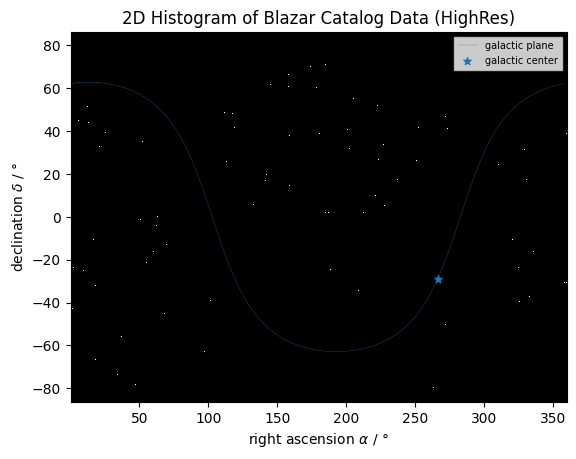

In [8]:
#catalog data
plt.hist2d(data.field(2), data.field(3), bins =[2800, 2800], cmap = "gray")
plt.title("2D Histogram of Blazar Catalog Data (HighRes)")
plt.xlabel(r"right ascension $\alpha$ / °")
plt.ylabel(r"declination $\delta$ / °")

#galactic plane and galactic center
l_interval = np.linspace(0, 360, 360) - np.linspace(243, 244, 360)
galactic_plane_coords = SkyCoord(l=l_interval*u.degree, b=0*u.degree, frame='galactic')
galactic_center_coords = SkyCoord(l=0*u.degree, b=0*u.degree, frame="galactic")
gp = plt.plot(galactic_plane_coords.icrs.ra, galactic_plane_coords.icrs.dec, linewidth=0.2, label="galactic plane")
gc = plt.scatter(galactic_center_coords.icrs.ra, galactic_center_coords.icrs.dec, s=30, marker="*", label="galactic center")
plt.legend(loc=1, fontsize=7, fancybox=False)

plt.savefig("/mnt/c/Users/joerg/OneDrive/Dokumente/UNI/Bachelor of Science/Bachelorarbeit/Jupyter Notebook/Figures/Blazar/2D_Histogram_Blazar_HighRes.png", dpi=1300)

# DATA CLEANING:
Take-home message: Always use pandas if possible

In [4]:
# converting fits data to pandas dataframe
tablehdu = fits.TableHDU(data)
tablehdu.writeto("/mnt/c/Users/joerg/OneDrive/Dokumente/UNI/Bachelor of Science/Bachelorarbeit/Jupyter Notebook/blazar.fits", overwrite=True)
datatable = Table.read("/mnt/c/Users/joerg/OneDrive/Dokumente/UNI/Bachelor of Science/Bachelorarbeit/Jupyter Notebook/blazar.fits", format="fits")
df = datatable.to_pandas()

# add galactic coordinates to dataframe
galactic_coords = SkyCoord(ra=data["RA"]*u.degree, dec=data["DEC"]*u.degree, frame="icrs").galactic
dataframe_list = list(zip(galactic_coords.l.degree, galactic_coords.b.degree))
df1 = pd.DataFrame(dataframe_list, columns=["l","b"])
df_complete_dataset = pd.concat([df, df1], axis=1)
df_complete_dataset

,SOURCE_NUMBER,NAME,RA,DEC,REDSHIFT,REDSHIFT_FLAG,FLUX_1P4_GHZ,RMAG,XRAY_FLUX,OBJECT_TYPE,LII,BII,FLUX_143_GHZ,GR_PHOTON_FLUX,RO_SPECTRAL_INDEX,l,b
0,1343,b'[MML2015] 5BZQ J0941-8615',145.481708,-86.250500,3.697,b' ',81.0,20.0,0.000000e+00,b'QSO RLoud flat radio sp.',299.899283,-24.556905,0,0.000000e+00,0.624,299.899290,-24.556906
1,1491,b'[MML2015] 5BZB J1026-8543',156.643667,-85.720639,0.000,b' ',267.0,16.9,2.600000e-13,b'BL Lac ',300.173251,-23.649011,0,9.000000e-10,0.502,300.173258,-23.649013
2,119,b'[MML2015] 5BZQ J0044-8422',11.110667,-84.377778,1.032,b' ',530.0,17.8,0.000000e+00,b'QSO RLoud flat radio sp.',303.135593,-32.747707,0,7.000000e-10,0.652,303.135600,-32.747708
3,2098,b'[MML2015] 5BZQ J1322-8419',200.615542,-84.326139,1.139,b' ',100.0,18.4,0.000000e+00,b'QSO RLoud flat radio sp.',303.753610,-21.503953,0,0.000000e+00,0.592,303.753617,-21.503954
4,3251,b'[MML2015] 5BZQ J2202-8338',330.580083,-83.636608,1.865,b' ',1100.0,19.3,0.000000e+00,b'QSO RLoud flat radio sp.',307.962149,-31.746110,408,2.900000e-09,0.827,307.962156,-31.746112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3556,2453,b'[MML2015] 5BZQ J1506+8319',226.603000,83.324439,2.577,b' ',202.0,18.8,0.000000e+00,b'QSO RLoud flat radio sp.',118.535482,32.610251,0,0.000000e+00,0.657,118.535489,32.610252
3557,1213,b'[MML2015] 5BZB J0859+8345',134.792750,83.750058,0.327,b'?',9.0,18.8,1.680000e-12,b'BL Lac ',129.074786,30.299588,0,0.000000e+00,0.447,129.074794,30.299590
3558,734,b'[MML2015] 5BZB J0508+8432',77.176500,84.534578,1.340,b' ',295.0,17.4,3.900000e-13,b'BL Lac ',128.351372,24.656271,0,0.000000e+00,0.545,128.351379,24.656273
3559,911,b'[MML2015] 5BZQ J0702+8549',105.636292,85.831189,1.059,b' ',246.0,17.8,1.600000e-13,b'QSO RLoud flat radio sp.',127.616838,27.252434,0,0.000000e+00,0.595,127.616845,27.252435


In [5]:
df3 = df_complete_dataset[(df_complete_dataset["DEC"]<-5) & (df_complete_dataset["DEC"]>-85)]
df4 = df3[df3["b"]>10]
df5 = df3[df3["b"]<-10]
df6 = pd.concat([df4, df5], ignore_index=True)
df7 = df6.copy()
for i in range(1207):
    if str(df6["OBJECT_TYPE"].values[i]) == "b'BL Lac Candidate        '":
        df7 = df7.drop(i)
df_clean = df7.reset_index(drop=True)
#df_clean.to_csv("/mnt/c/Users/joerg/OneDrive/Dokumente/UNI/Bachelor of Science/Bachelorarbeit/Jupyter Notebook/blazar_clean.csv")
df_clean

,SOURCE_NUMBER,NAME,RA,DEC,REDSHIFT,REDSHIFT_FLAG,FLUX_1P4_GHZ,RMAG,XRAY_FLUX,OBJECT_TYPE,LII,BII,FLUX_143_GHZ,GR_PHOTON_FLUX,RO_SPECTRAL_INDEX,l,b
0,1916,b'[MML2015] 5BZB J1227-4436',186.861167,-44.610639,0.000,b' ',320.0,17.1,0.000000e+00,b'BL Lac ',298.444279,18.051944,0,0.000000e+00,0.533,298.444289,18.051943
1,1829,b'[MML2015] 5BZQ J1204-5055',181.245458,-50.932389,1.083,b' ',50.0,19.9,0.000000e+00,b'QSO RLoud flat radio sp.',295.498645,11.267647,0,0.000000e+00,0.637,295.498654,11.267646
2,1668,b'[MML2015] 5BZQ J1118-4634',169.612292,-46.570828,0.713,b' ',2570.0,16.5,9.600000e-13,b'QSO RLoud flat radio sp.',286.738438,13.356430,625,6.000000e-10,0.657,286.738448,13.356430
3,2047,b'[MML2015] 5BZQ J1303-4621',195.917792,-46.350639,1.664,b' ',76.0,0.0,0.000000e+00,b'QSO RLoud flat radio sp.',305.132702,16.468829,0,7.000000e-10,0.000,305.132712,16.468827
4,2326,b'[MML2015] 5BZQ J1425-4604',216.295708,-46.081639,2.032,b' ',397.0,17.9,0.000000e+00,b'QSO RLoud flat radio sp.',319.433074,13.764948,0,0.000000e+00,0.629,319.433082,13.764946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,3029,b'[MML2015] 5BZQ J1951-0509',297.947750,-5.162219,1.083,b' ',184.0,19.5,6.000000e-14,b'QSO RLoud flat radio sp.',35.203040,-15.768896,0,0.000000e+00,0.707,35.203050,-15.768898
1173,3073,b'[MML2015] 5BZQ J2018-0509',304.740667,-5.158169,0.905,b' ',71.0,19.0,0.000000e+00,b'QSO RLoud flat radio sp.',38.446908,-21.798019,255,0.000000e+00,0.608,38.446918,-21.798021
1174,3126,b'[MML2015] 5BZG J2055-0506',313.847417,-5.105358,0.342,b' ',20.0,18.4,0.000000e+00,b'BL Lac-galaxy dominated ',43.196983,-29.800140,0,0.000000e+00,0.369,43.196993,-29.800142
1175,421,b'[MML2015] 5BZB J0240-0504',40.233958,-5.078328,0.000,b' ',237.0,19.1,0.000000e+00,b'BL Lac ',177.609241,-55.851728,0,0.000000e+00,0.708,177.609251,-55.851726


## Blazar Catalog Data Plot (Cleaned Data)

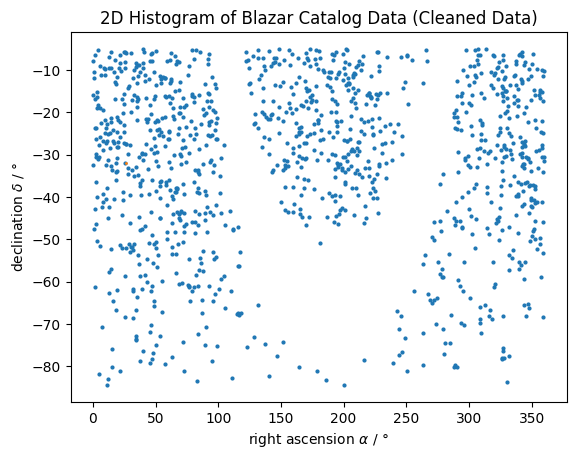

In [14]:
equatorial = SkyCoord(ra=df_clean["RA"].values*u.degree, dec=df_clean["DEC"].values*u.degree, frame="icrs")
#plt.scatter(equatorial.galactic.l, equatorial.galactic.b, s=10)
plt.scatter(df_clean["RA"].values, df_clean["DEC"].values, s=4)
plt.title("2D Histogram of Blazar Catalog Data (Cleaned Data)")
plt.xlabel(r"right ascension $\alpha$ / °")
plt.ylabel(r"declination $\delta$ / °")

l_interval = np.linspace(0, 360, 360) - np.linspace(141, 332, 360)
galactic_plane_coords = SkyCoord(l=l_interval*u.degree, b=0*u.degree, frame='galactic')
#gp = plt.plot(galactic_plane_coords.icrs.ra, galactic_plane_coords.icrs.dec, linewidth=0.5, label="galactic plane")

#galactic_plane_upper = SkyCoord(l=l_interval*u.degree, b=-10*u.degree, frame='galactic')
#galactic_plane_lower = SkyCoord(l=l_interval*u.degree, b=10*u.degree, frame='galactic')
#gp1 = plt.plot(galactic_plane_upper.icrs.ra, galactic_plane_upper.icrs.dec, linewidth=0.5, label="galactic plane1")
#gp2 = plt.plot(galactic_plane_lower.icrs.ra, galactic_plane_lower.icrs.dec, linewidth=0.5, label="galactic plane2")

## Working with cleaned data: Redshift distribution

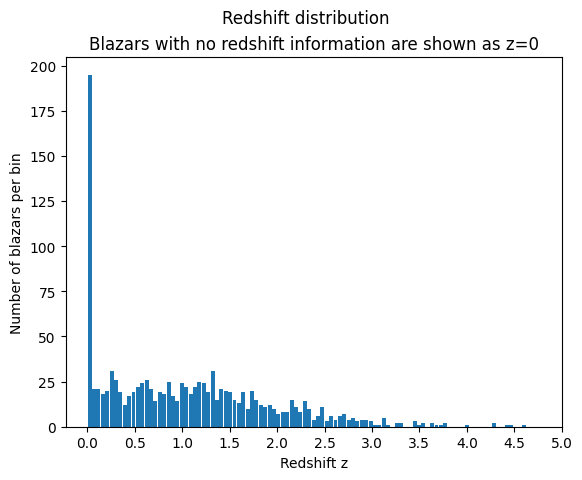

In [7]:
plt.hist(df_clean["REDSHIFT"], bins=100, rwidth=0.9)
plt.title("Blazars with no redshift information are shown as z=0")
plt.suptitle("Redshift distribution")
plt.xlabel("Redshift z")
plt.ylabel("Number of blazars per bin")
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()